# Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The dataset consists of customer data from IBM Sample Data Sets which has volumes of data collected about customers that can be used to build churn prediction models. 

The task is to train a machine learning model with the aim of building and comparing several customer churn prediction models. 

# Importing Dataset

In [45]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Importing Training Dataset
df=pd.read_csv('customer_churn.csv')
#Visualizing first 5 rows of dataset
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


We have 7043 rows and 21 columns in our Dataset. We have a column named customerID, hence we will make this column as our index as it has no relevance in achieving our Model's prediction.

In [47]:
#Setting CustomerID as index
df.set_index('customerID',inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


Now we have 7043 rows and 20 columns in our dataset.

# Checking Null Values & Treating Them

In [48]:
#Checking Null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

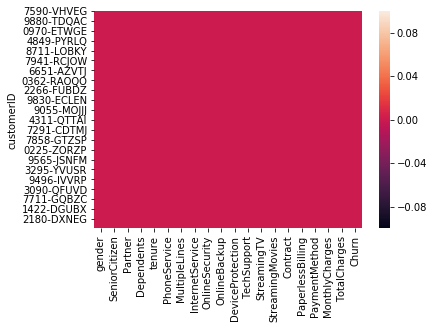

In [49]:
#Visualizing null values through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

There are no Null Values in our dataset. Hence, we can proceed forward with visualizing our data.

# Making DataFrame for the Nominal Data

In [50]:
#Copying nominal variables into a new dataframe
df_nominal=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']].copy()

In [51]:
#Checking columns of new nominal dataframe created
df_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [52]:
#Checking shape of nominal data
df_nominal.shape

(7043, 17)

The nominal/categorical data consists of 19 columns

# Visualization of Data


For the nominal categorical data we will use countplot as it will gives frequency of the columns.

In [53]:
#Importing Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

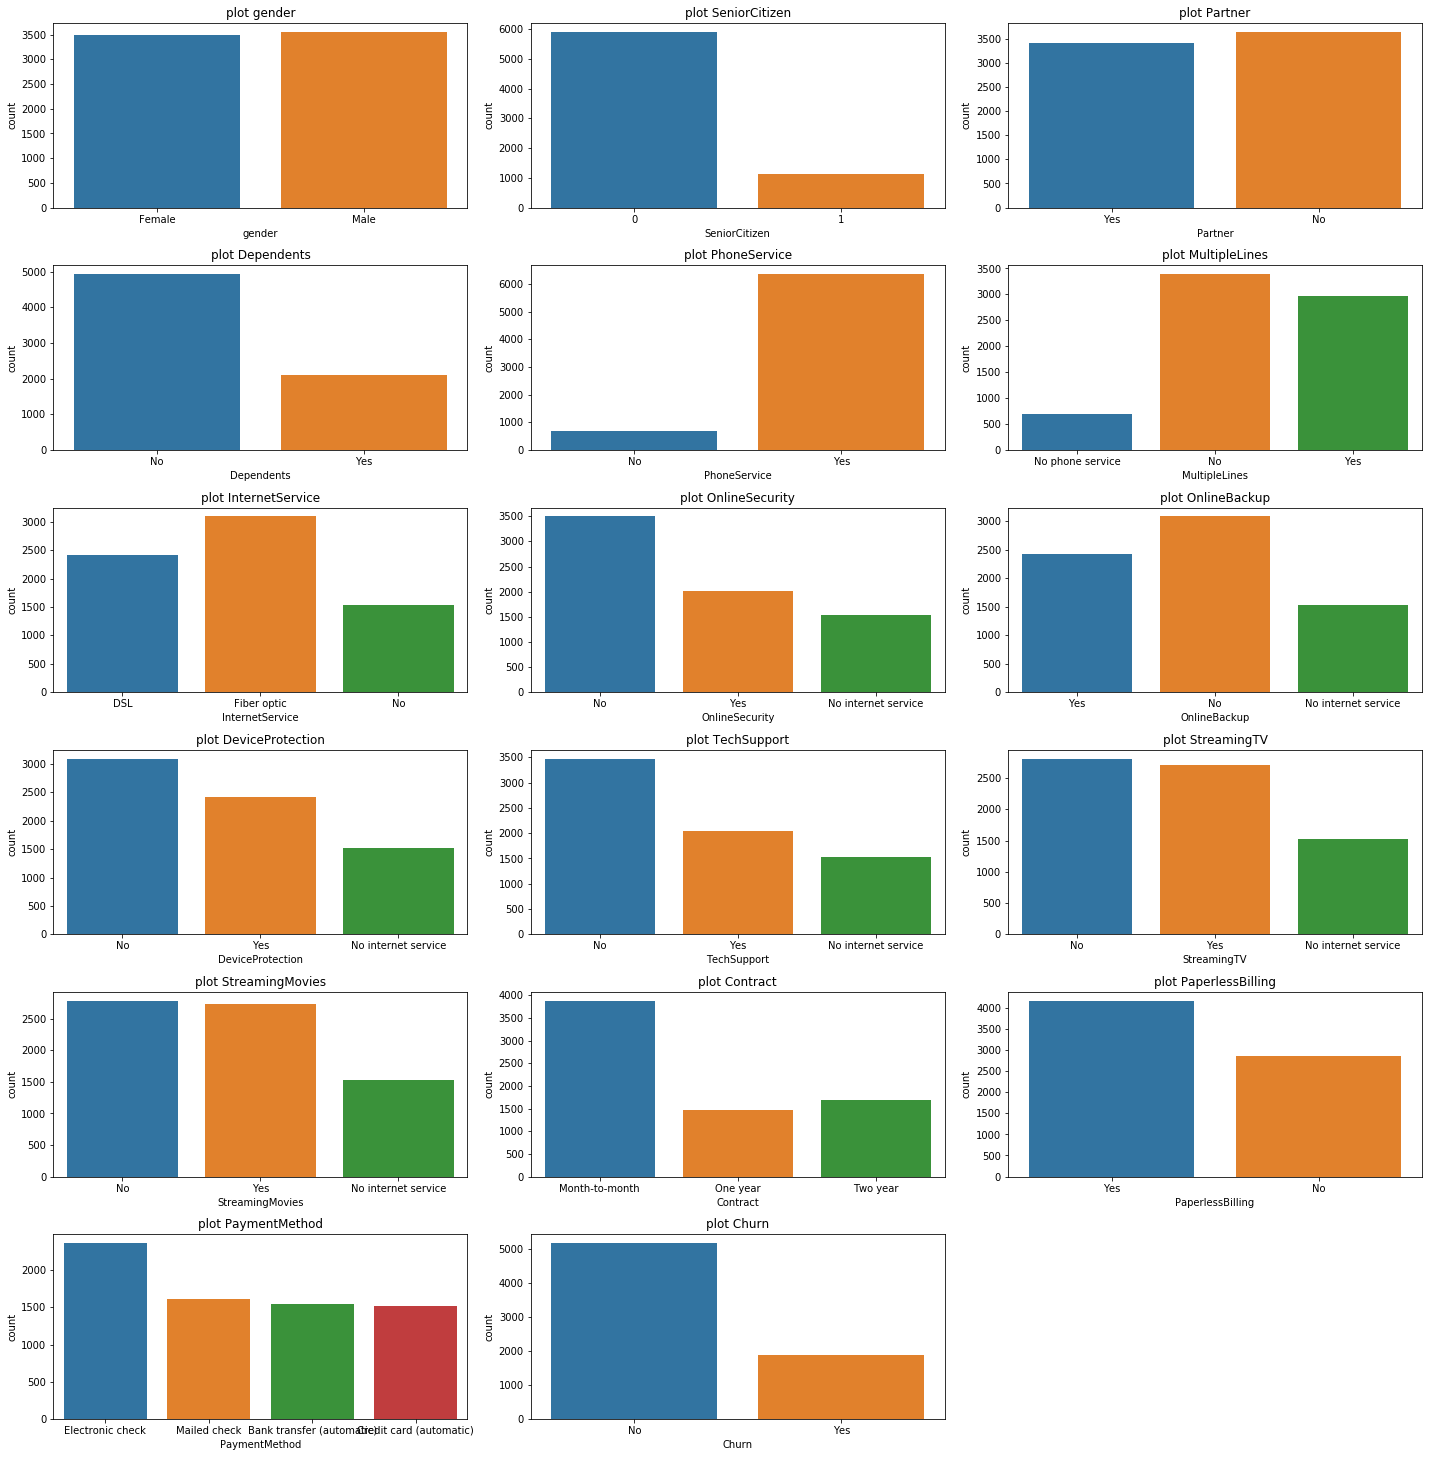

In [54]:
#Visualizing different columns using distplot
ncol,nrow=9,3
ab=df_nominal.columns.values
plt.figure(figsize=(20,30))
for index,i in enumerate(ab):
    ab=plt.subplot(ncol,nrow,index+1)
    sns.countplot(df[i])
    plt.title(f"plot {i}")
    plt.tight_layout()
plt.show()

Observations:
    
The number of Male and Female customers are almsot equal.

Around 5900 customers are not senior ctizens, but only around 1100 customers are senior citizens.

Around 3400 customers have a partner but more than 3500 customers do not have a partner.

Nearly around 5000 customers do not have any dependents but only around 2200 customers have dependents.

Very less customers around 600 do not have a phone service but more than 6000 customers have a phone service.

Around 3300 customers do not have multiple line service, around 700 have no phone service but around 2850 customers have multiple line service.

3000 customers have fibre optic Internet Service, 2400 have DSL and 1500 have no Internet Service.

3500 customers have no Online Security, 2000 have Online security and 1500 have no Internet Service.

2400 customers have online backup, 3000 have no Online Backup and 1500 have no Internet Service.

3150 customers do noy have any Device Protection, 2350 have Device Protection and 1500 have no Internet Service.

Around 3450 customers have no Tech Support, 2000 have Tech Support and 1500 have no Internet Service.

Around 3000 customers do not have Streaming TV, 2700 have Streaming TV and 1500 have no Internet Service.

Around 2850 customers do not have Streaming Movies, 2750 have Streaming Movies and 1500 have no Internet Service.

3900 customers have a contract on month to month basis, 1500 have an yearly based contract and 1700 have contracts for 2 years.

4200 customers have a Paperless billing and only 2800 customers do not have a Paperless billing.

Around 2400 customers make Payments through electronic check and around 1500 customers make payments via Mail Check, Bank Transfer and Credit Card each.

More than 5000 customer's churn is no, only 1900 customer's churn is Yes.


# Making DataFrame of the Continuous type of Values

In [55]:
#Copying our continuous data into a new dataframe
df_continuous=df[['tenure','MonthlyCharges', 'TotalCharges']].copy()

In [56]:
#Checking columns of new continuous dataframe created
df_continuous.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [57]:
#Checking shape of nominal data
df_continuous.shape

(7043, 3)

The continuous data consists of 3 columns.

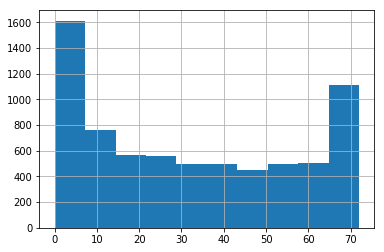

In [58]:
#Univariate Analysis
df['tenure'].hist(grid=True)

Maximum customers have tenure between 0 to 7 and between 65 to 72.

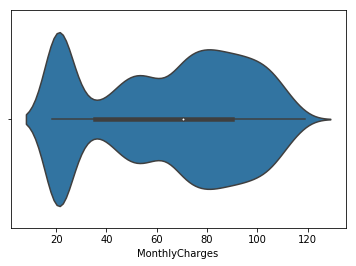

In [59]:
sns.violinplot(x='MonthlyCharges',data=df)

Monthly charges are maximum in the range 15 to 25, less between 40 to 60 again reaches high between 75 to 105.

In [60]:
#Checking Data type of each column
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As we can see that the Variable 'TotalCharges' is of the object datatype. To Visualize this data we will have to encode our data and convert all object variables into float values.

# Encoding of DataFrame

In [61]:
#Importing library for encoding and creating instance for the same 
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [62]:
#Converting object datatype into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [63]:
#Verifying Conversion 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
7795-CFOCW,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0


We can observe that our object datatype has been converted into float values.

# Visualizing Variable TotalCharges

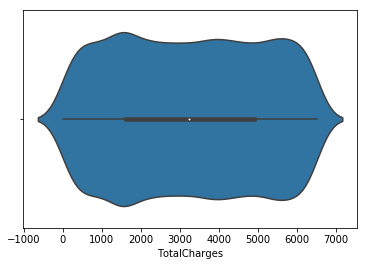

In [64]:
sns.violinplot(x='TotalCharges',data=df)

The values of TotalCharges are in between the range 500 and 6500 constantly.

# Describe Data


In [65]:
#Describing final columns present in dataset
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [66]:
#Defining Shape of Dataframe
df.shape

(7043, 20)

In [67]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null float64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null float64
Dependents          7043 non-null float64
tenure              7043 non-null int64
PhoneService        7043 non-null float64
MultipleLines       7043 non-null float64
InternetService     7043 non-null float64
OnlineSecurity      7043 non-null float64
OnlineBackup        7043 non-null float64
DeviceProtection    7043 non-null float64
TechSupport         7043 non-null float64
StreamingTV         7043 non-null float64
StreamingMovies     7043 non-null float64
Contract            7043 non-null float64
PaperlessBilling    7043 non-null float64
PaymentMethod       7043 non-null float64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null float64
dtypes: float64(18), int64(2)
memory usage: 1.4

We have 7043 rows, 20 columns in our dataset with no null values present and the values are in the Float/int data type. Hence, we can move forward with finding correlations in the data.

In [68]:
#Describing mean, median, min, max values of data
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


Let's try understanding the above data using Visualization to get a better idea.

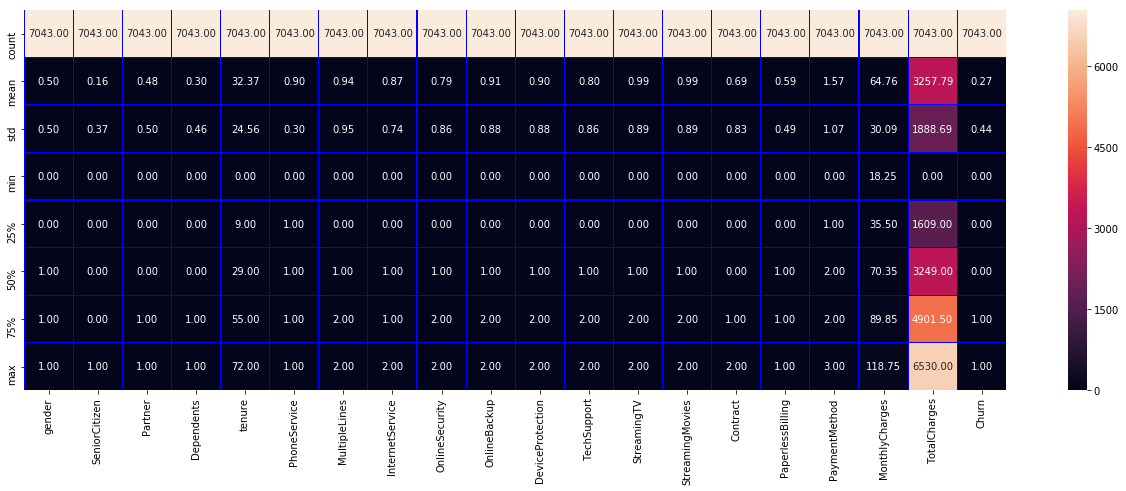

In [69]:
#Visualizing data description
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

Observation:
    
The standard deviation of almost all columns is very less which means that the data is not largely scattered, shows a normal distribution and does not contain skewness.

Only columns tenure, Monthly Charges and Total Charges show high standard deviation.

The values are high only in the Total Charges variable which contains maximum value at 6530 within the column.

As most of our data consists of the string datatype values so we dont see any chance of having outliers in the data.

# Correlation of Columns with the Target Variable

In [70]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


We can observe both positive and negative correlations within the data. Let's visualize these correlations to get a better understanding of data.

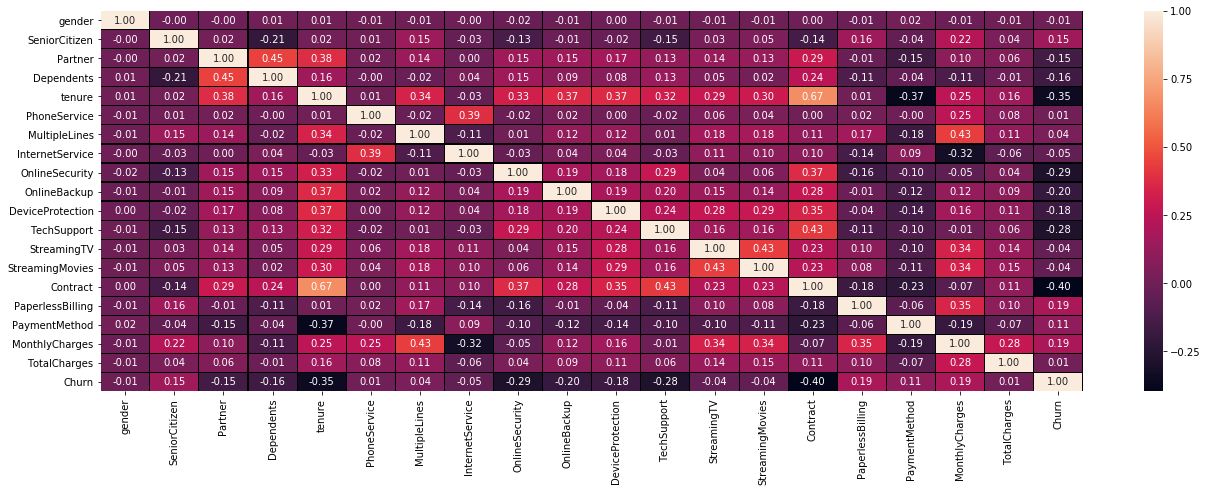

In [71]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observation:
    
The Target Variable Churn is most positively correlated with variables MonthlyCharges & PaperlessBilling.

The Target Variable Churn is most negatively correlated with variables tenure & Contract.

We can observe that the negative correlations are much more stronger than the positive correlations.

In [72]:
#Sorting correlation in order with the Target Variable
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

The positively correlated columns with the Target Variable are MonthlyCharges, PaperlessBilling, SeniorCitizen, PaymentMethod, MultipleLines, TotalCharges & PhoneService.

The negatively correlated columns with the Target Variable are gender, StreamingTV, StreamingMovies, InternetService, Partner, Dependents, DeviceProtection, OnlineBackup, TechSupport, OnlineSecurity, tenure & Contract.        

Most columns are negatively correlated with the Target Variable whereas hardly some are positively correlated.

# Checking Skewness

In [73]:
#Checking Skewness
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, we can see that the variables that are showing skewness in it's values are of the string datatype, hence we don't consider this as skewness present in values.

The continuous type of variables such as tenure, Monthly Charges & Total Charges are not showing any skewness in it's values.

Hence, we don't have skewness present in our data. The data is not skewed so we will not remove the skewness.

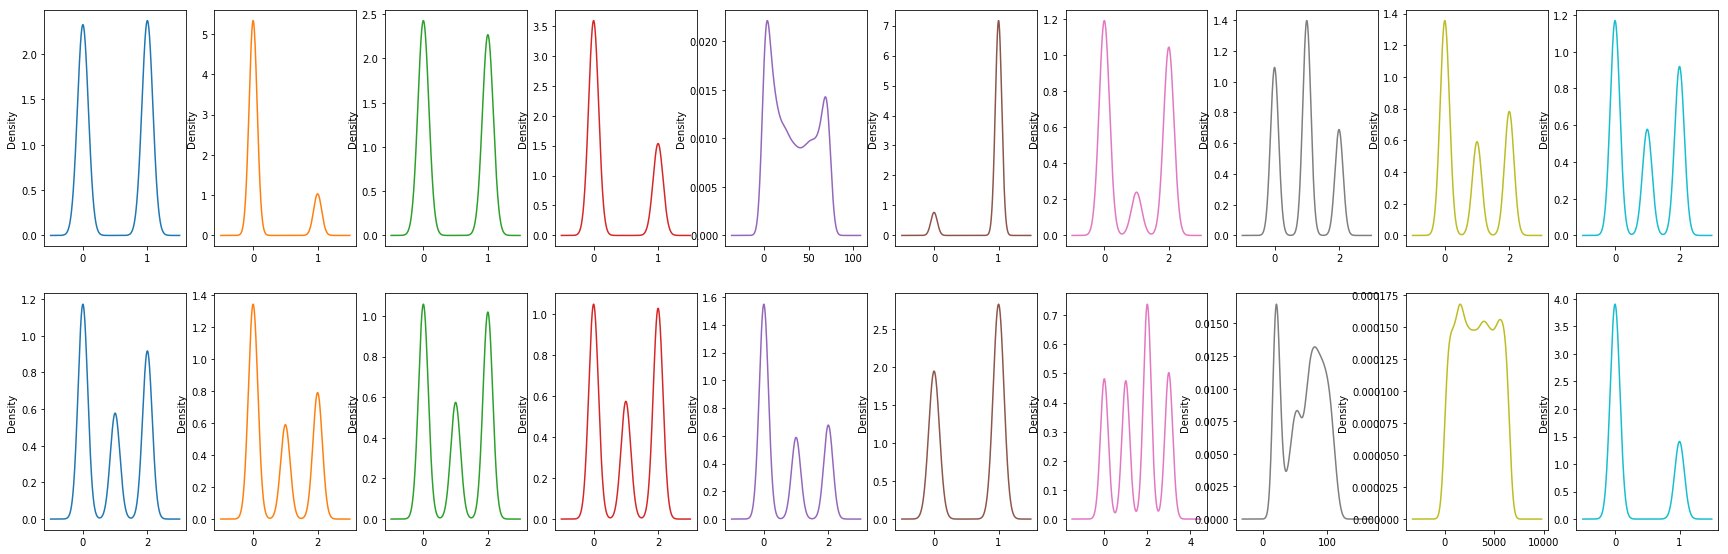

In [74]:
#Visualizing skewness on density graph
#Example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(4,10),legend=False,sharex=False,figsize=(30,20))
plt.show()

We can see that our data is not showing skewness in any of the columns from the above graph.

# Check Outliers

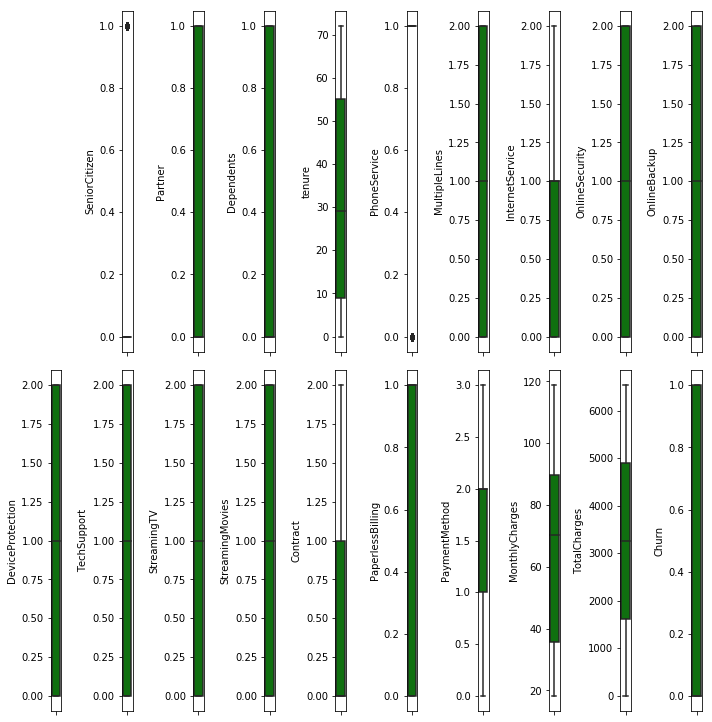

In [75]:
#Visualizing outliers of different variables
collist=df.columns.values
ncol=10
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Since we do not see any outliers present in our dataset, we will proceed forward with training data.

# Separating the column into x & y

In [76]:
#Creating x & y columns 
x=df.drop('Churn',axis=1)
y=df['Churn']

Separating the columns into x & y as input featues and target variable respectively.

# Scaling Data using Min Max Scaler

In [77]:
#Importing libraries for Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [78]:
#define min max scaler
mms=MinMaxScaler()
# transform data
ab=mms.fit_transform(df)
print(ab)

[[0.         0.         1.         ... 0.11542289 0.38361409 0.        ]
 [1.         0.         0.         ... 0.38507463 0.2245023  0.        ]
 [1.         0.         0.         ... 0.35422886 0.02404288 1.        ]
 ...
 [0.         0.         1.         ... 0.11293532 0.45849923 0.        ]
 [1.         1.         1.         ... 0.55870647 0.40735069 1.        ]
 [1.         0.         0.         ... 0.86965174 0.8280245  0.        ]]


Hence, the data is Scaled.

Since our Target Variable has binary values, we use Classification Algorithms.

# Model Building

In [79]:
#importing Libraries for buiding model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [80]:
#Code for finding best random state
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {accuracy_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {accuracy_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.8074192403265885
At random state 0, the testing accuracy is: 0.794889992902768


At random state 1, the training accuracy is: 0.8022719204827831
At random state 1, the testing accuracy is: 0.8069552874378992


At random state 2, the training accuracy is: 0.80386936457224
At random state 2, the testing accuracy is: 0.8076650106458482


At random state 3, the training accuracy is: 0.8019169329073482
At random state 3, the testing accuracy is: 0.815471965933286


At random state 4, the training accuracy is: 0.8061767838125665
At random state 4, the testing accuracy is: 0.7849538679914834


At random state 5, the training accuracy is: 0.805111821086262
At random state 5, the testing accuracy is: 0.7977288857345636


At random state 6, the training accuracy is: 0.805111821086262
At random state 6, the testing accuracy is: 0.8026969481902059


At random state 7, the training accuracy is: 0.8035143769968051
At random state 7, the testing accuracy

At random state 63, the training accuracy is: 0.8084842030528931
At random state 63, the testing accuracy is: 0.7927608232789212


At random state 64, the training accuracy is: 0.8042243521476748
At random state 64, the testing accuracy is: 0.8041163946061036


At random state 65, the training accuracy is: 0.8049343272985445
At random state 65, the testing accuracy is: 0.7991483321504613


At random state 66, the training accuracy is: 0.8040468583599574
At random state 66, the testing accuracy is: 0.8048261178140526


At random state 67, the training accuracy is: 0.8022719204827831
At random state 67, the testing accuracy is: 0.815471965933286


At random state 68, the training accuracy is: 0.8031593894213702
At random state 68, the testing accuracy is: 0.808374733853797


At random state 69, the training accuracy is: 0.8033368832090877
At random state 69, the testing accuracy is: 0.808374733853797


At random state 70, the training accuracy is: 0.8079517216897408
At random state 70, t

At random state 125, the training accuracy is: 0.8036918707845225
At random state 125, the testing accuracy is: 0.8069552874378992


At random state 126, the training accuracy is: 0.80386936457224
At random state 126, the testing accuracy is: 0.8161816891412349


At random state 127, the training accuracy is: 0.8054668086616968
At random state 127, the testing accuracy is: 0.8055358410220014


At random state 128, the training accuracy is: 0.8056443024494143
At random state 128, the testing accuracy is: 0.8133427963094393


At random state 129, the training accuracy is: 0.8017394391196309
At random state 129, the testing accuracy is: 0.8176011355571328


At random state 130, the training accuracy is: 0.81008164714235
At random state 130, the testing accuracy is: 0.7920511000709723


At random state 131, the training accuracy is: 0.8070642527511537
At random state 131, the testing accuracy is: 0.7991483321504613


At random state 132, the training accuracy is: 0.8035143769968051
At rand

At random state 189, the training accuracy is: 0.8091941782037628
At random state 189, the testing accuracy is: 0.7892122072391767


At random state 190, the training accuracy is: 0.8045793397231097
At random state 190, the testing accuracy is: 0.8026969481902059


At random state 191, the training accuracy is: 0.8047568335108272
At random state 191, the testing accuracy is: 0.7991483321504613


At random state 192, the training accuracy is: 0.8061767838125665
At random state 192, the testing accuracy is: 0.8062455642299503


At random state 193, the training accuracy is: 0.8024494142705005
At random state 193, the testing accuracy is: 0.8055358410220014


At random state 194, the training accuracy is: 0.8054668086616968
At random state 194, the testing accuracy is: 0.8041163946061036


At random state 195, the training accuracy is: 0.8047568335108272
At random state 195, the testing accuracy is: 0.8019872249822569


At random state 196, the training accuracy is: 0.8079517216897408
At 

We are getting best testing accuracy as 82.61% and training accuracy as 80.17% on random state 92. Hence, we select random state as 92.

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=92)

We split our data into Training and Testing giving 78% data for Training and 22% for Testing at best random state 92. We will use different algorithms for comparing accuracies and attain the best model. We will compare Logitic Regression, GaussianNB, SVC and KNeighborsClassifier in this case.

In [82]:
model=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(),SVC()]

In [83]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is:
0.82
[[1046   94]
 [ 185  225]]
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      1140
         1.0       0.71      0.55      0.62       410

   micro avg       0.82      0.82      0.82      1550
   macro avg       0.78      0.73      0.75      1550
weighted avg       0.81      0.82      0.81      1550



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.7664516129032258
[[890 250]
 [112 298]]
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1140
         1.0       0.54      0.73      0.62       410

   micro avg       0.77      0.77      0.77      1550
   macro avg       0.72   

We get accuracy 82% for Logistic Regression, 76.64% for GaussianNB, 74.77% for KNeighborsClassifier and 75.61% for SVC.

We might attain this accuracy due to Overfitting/Underfitting problems as well. Let's use different Testing Techniques to test accuracy. 

# Cross Validation of the Model

In [84]:
#Finding best cv score at a particular cv
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and r2 score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.7993750001007986 and r2 score for training is 0.7970143819406518 and accuracy for the testing is 0.8264516129032258


At cross fold 3 the cv score is 0.8053393521082528 and r2 score for training is 0.7970143819406518 and accuracy for the testing is 0.8264516129032258


At cross fold 4 the cv score is 0.8026409977115996 and r2 score for training is 0.7970143819406518 and accuracy for the testing is 0.8264516129032258


At cross fold 5 the cv score is 0.8023589847578492 and r2 score for training is 0.7970143819406518 and accuracy for the testing is 0.8264516129032258


At cross fold 6 the cv score is 0.8034943679805502 and r2 score for training is 0.7970143819406518 and accuracy for the testing is 0.8264516129032258


At cross fold 7 the cv score is 0.8047718794341343 and r2 score for training is 0.7970143819406518 and accuracy for the testing is 0.8264516129032258


At cross fold 8 the cv score is 0.8029317243847398 and r2 score for training is 0.797014

cv=3 gives us the best cv score at 80.53% for Logistic Regression. We use cv=3 for cross validation. We will check cross validation on all the algorithms that we've used above.

In [85]:
for m in model:
    cv_score=cross_val_score(m,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("Cross Validation score of ",m," model: ",cv_score.mean())
    print('\n')
    print('\n')

Cross Validation score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)  model:  0.8034963321027138




Cross Validation score of  GaussianNB(priors=None, var_smoothing=1e-09)  model:  0.7557872336756024




Cross Validation score of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')  model:  0.7513843874297312




Cross Validation score of  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)  model:  0.7579181612992517






The cross Validation score for Logistic Regression is 80.34%, GaussianNB is 75.57, KNeighborsClassifier is 75.13 and SVC is 75.79.

The difference between the accuracy score and cv score of Logistic Regression is 1.66, GaussianNB is 1.07, KNeighborsClassifier is 0.36 and SVC is 0.18.

Hence, SVC is giving us better accuracy than that of any other algorithm used. So we proceed using SVC for our project.

# Ensemble Techniques

In [86]:
#importing libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc=SVC()

In [87]:
#Create adaboost classifier object
ad=AdaBoostClassifier(n_estimators=50, base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [88]:
#printing accuracy metrics
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7354838709677419
[[1140    0]
 [ 410    0]]
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      1140
         1.0       0.00      0.00      0.00       410

   micro avg       0.74      0.74      0.74      1550
   macro avg       0.37      0.50      0.42      1550
weighted avg       0.54      0.74      0.62      1550



We get an accuracy score of 73.54% by using Ensemble Technique Ada Boost Classifier keeping it's base estimator as SVC because SVC gave us the best accuracy for it's cross validation. Hence, we continued to use this algorithm and apply different testing techniques to it to attain the best accuracy.

# Creating Confusion Matrix


In [100]:
#Importing Libraries to create confusion matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [102]:
#Creating confusion matrix
svc=SVC()

score=cross_val_score(svc,x,y,cv=3)
print("Score:",score)

print("Mean Scores",score.mean())
print("Standard deviation",score.std())

y_pred=cross_val_predict(svc,x,y,cv=3)

print('Y Prediction values ')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.75596252 0.75383305 0.75713677]
Mean Scores 0.7556441136811961
Standard deviation 0.00136740156766511
Y Prediction values 
[0. 0. 0. ... 0. 0. 0.]


array([[5084,   90],
       [1631,  238]], dtype=int64)

After applying confusion matrix to our algorithm, we get our cross val mean score as 75.56% with standard deviation of 0.001 which is very less which indicates that the data points tend to be very close to the mean.

From the above confusion matrix, we can observe that True Positive is 5084 and True Negative is 238, rest all are Type 1 and Type 2 errors.

# Saving The Model

In [103]:
import pickle
filename='Customer_Churn.pkl'
pickle.dump(ad,open(filename,'wb'))